## Loading Data

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv(r'C:\Users\Lenovo\Desktop\Airbnb_Price_Analysis\data\NYC-Airbnb-2023-Cleaned.csv')

In [14]:
## Top five rows of the dataset

data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21 00:00:00,0.30,3,314,1
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02 00:00:00,0.30,2,365,0
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21 00:00:00,0.72,1,0,0
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19 00:00:00,3.41,1,106,52
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10 00:00:00,0.03,1,181,1


In [ ]:
data.isnull().sum()

#### As you can see our data is cleaned.

## EDA on the dataset

In [20]:
data['room_type'].value_counts()

room_type
Entire home/apt    23976
Private room       17759
Shared room          570
Hotel room           195
Name: count, dtype: int64

In [45]:
average_price_of_all_room_type = [data[data['room_type'] == 'Entire home/apt']['price'].mean(),
                                  data[data['room_type'] == 'Private room']['price'].mean(),
                                  data[data['room_type'] == 'Shared room']['price'].mean(),
                                  data[data['room_type'] == 'Hotel room']['price'].mean()]

In [55]:
for room_type, price in zip(data['room_type'].unique(), average_price_of_all_room_type):
    print(f'The average price of {room_type} is {np.round(price, 2)}')

The average price of Entire home/apt is 216.66
The average price of Private room is 102.81
The average price of Hotel room is 88.7
The average price of Shared room is 297.32


Text(0.5, 1.0, 'Average Price of Different Room Types')

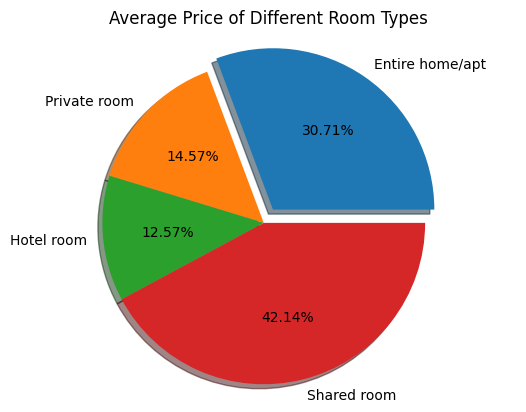

In [58]:
plt.pie(average_price_of_all_room_type, labels = data['room_type'].unique(), autopct = '%.2f%%', explode=[0.1, 0, 0, 0], shadow = True)
plt.axis('equal')
plt.title('Average Price of Different Room Types')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12720\1719894261.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = data['room_type'], y = data['price'], palette='viridis')


Text(0.5, 1.0, 'Room Type Distribution')

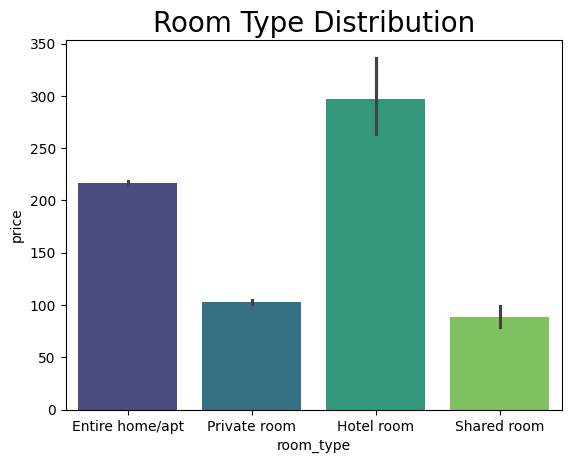

In [19]:
sns.barplot(x = data['room_type'], y = data['price'], palette='viridis')
plt.title('Room Type Distribution', fontsize=20)

### So as we can that hotel room type charges more as compare to other home types.

<Axes: xlabel='room_type', ylabel='price'>

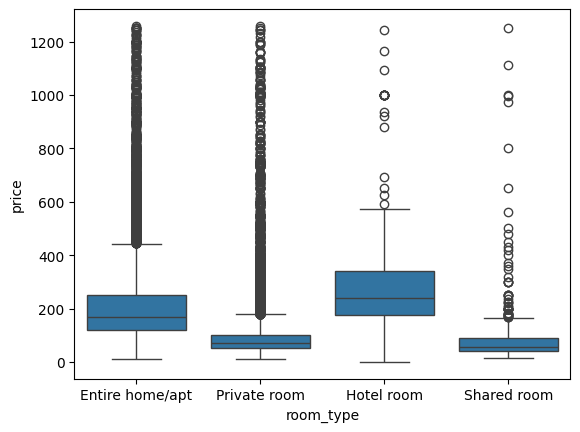

In [61]:
sns.boxplot(x = data['room_type'], y = data['price'])